<a href="https://colab.research.google.com/github/kumar-mahendra/ML_Algorithms/blob/main/KNN_KD_Trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Algorithm : KNN-KD-tree building (KNNKDTB) <br>
- <b>Input</b>: P, a set of training points; depth, the current depth
- <b>Output</b>: treeroot, the root of the KD-tree storing P
1. `Treeroot` <-- root(P)
2. `While` (P != null)
3.  ... select axis = depth <b>mod</b> k
4.  ... sort P and select median by axis from P
5.  ... root.location median
6.  ... root.leftChild  KNNKDTB(points in P before median, depth+1)
7.  ... root.rightChild  KNNKDTB(points in P after median, depth+1)
8. `End while`
9. `Output` - treeroot

In [315]:
# Implementation of KD Tree 


# import required libraries 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


# Class to build KD Tree   

class Root:
  def __init__(self,P,axis=0, k=-1):   # k = -1 suggests select all dimensions, Using Top down approach start from axis = 0 till axis = #classes/features

    self.axis = axis   # current axis
    self.arr = P
    # Base Case : P == NULL or current_axis==k (if k is provided)
    if ((axis == len(P[0])) or (axis == k)) :   
      self.axis = -1
      return None   
  
    P = np.array(sorted( P , key = lambda x : x[axis]))   # sort P by current axis
    self.median = P[ len(P)//2 ]                          # select median by current axis

    self.median_idx = np.where( (P==self.median).any(axis=1)==True )[0][0]
    self.leftChild = P[ np.where((P[:,axis]) <  P [ self.median_idx,axis ])]   # left Child
    self.rightChild = P[ np.where((P[:,axis]) >= P[ self.median_idx,axis ])]   # right Child 
    self.leftChildRoot =  Root(self.leftChild,axis+1)                          # root of left Child
    self.rightChildRoot = Root(self.rightChild ,axis+1)                        # root of right Child   


def traverseKD_Tree(A,depth):
  
  if A.axis == -1 :
    return

  print("\n root        <-- ",A.median,"\n left_Child  <-- ",*A.Left,"\n right_Child <-- " ,*A.Right)    
  
  depth+=1
  traverseKD_Tree(A.leftChild,depth)
  traverseKD_Tree(A.rightChild,depth)

# Find neighbors of x 
def KD_Neighbors(P,x):
  if P.axis == -1 :
    return P.arr
  if x[P.axis]>= P.arr[ P.median_idx, P.axis] :
    return KD_Neighbors(P.rightChildRoot,x)
  else : 
    return KD_Neighbors(P.leftChildRoot,x)

# apply KNN algorithm on just neighbors found in KD_Tree 

def KNN_KDTree(train,test_set):

    P = Root(train)
    label = []

    for x in test_set : 
        neighbors = KD_Neighbors(P,x)
        index = df_.index
        nbrs_index = []
        ch = np.array([0 for _ in range(df.loc[:,'y'].nunique())])  # array to contain occurence of each class in neighbors 
        for nbr in neighbors : 
            ch[df_.iloc[index[(df_.iloc[:,:2] == nbr).any(axis=1)][0],2]] += 1
            
        # print(ch)

        label.append(np.where(ch==max(ch))[0][0])   # index of maximum occuring element 
    
    return label


P = np.array([(1,9),(2,3),(4,1),(3,7),(5,4),(6,8),(7,2),(8,8),(7,9),(9,6)])
labels = np.array([0,1,1,0,1,1,1,1,0,0])
Treeroot = Root(P)

# Print KD_Tree
traverseKD_Tree(A,0)




 root        <--  [6 8] 
 left_Child  <--  [1 9] [2 3] [3 7] [4 1] [5 4] 
 right_Child <--  [6 8] [7 2] [7 9] [8 8] [9 6]

 root        <--  [5 4] 
 left_Child  <--  [4 1] [2 3] 
 right_Child <--  [5 4] [3 7] [1 9]

 root        <--  [6 8] 
 left_Child  <--  [7 2] [9 6] 
 right_Child <--  [6 8] [8 8] [7 9]


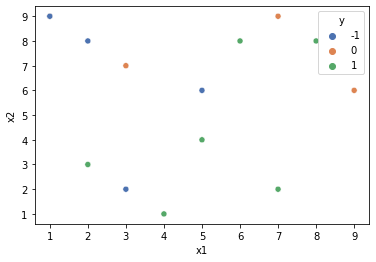

In [316]:
# Vizualise Data 

# make pandas dataframe
table = np.array([P[:,0],P[:,1],labels]).T
df = pd.DataFrame(data=table,columns=['x1','x2','y'])

P_new = np.array([(3,2),(2,8),(5,6),(1,9)])
labels_new = np.array([-1,-1,-1,-1])
table = np.array([P_new[:,0],P_new[:,1],labels_new]).T
df_new = pd.DataFrame(data=table,columns=['x1','x2','y'])


df_ = pd.concat([df,df_new],axis=0)


sns.scatterplot(data= df_,x='x1',y='x2',hue='y',palette='deep')



In [317]:
# expected_output : [1,0,1,0]

P = np.array([(1,9),(2,3),(4,1),(3,7),(5,4),(6,8),(7,2),(8,8),(7,9),(9,6)])
labels = np.array([0,1,1,0,1,1,1,1,0,0])
test_set = np.array([(3,2),(2,8),(5,6),(1,9)])
test_labels = KNN_KDTree(P,test_set)
print(" prediction : ",test_labels)

#predicted output : [1,0,1,0]


[0 2]
[2 1]
[0 2]
[2 1]
[1, 0, 1, 0]
